<h2><center><h1><center><font color='Red'> Credit Card  <font color='Green'> Fraud <font color='Blue'> Detection  <font color='Orange'> - Capstone Project :


<h5><center> By <br><br>
Farooq Ahmed  <br>
email <font color='Blue'> farooqams@hotmail.com<font color='Blue'> <br>
<h4><center> August 2022<br><br>

#### Objective of the Capstone Project 

###### The capstone project required to build an Credit Card Fraud Detection Model using Random Forest, Decision Tree, XGBoost (Multi-Thread Processing). We did not pursued with Logistic L1/L2 and SVM due computational processing, which required signifcant additional processing time. 


###### We will approach the problem by  assessing the significant drivers /layers and identifying the problem by Pythonic way, reducing duplcating task where possible / applicable. In addtion, using in Google Colab Pro (if Required using GPU / Multi-Tread Processing). 


# Reset Colab Drive - Optional 

In [2]:
from google.colab import drive
drive.flush_and_unmount()
print("Data Deleted")


Drive not mounted, so nothing to flush and unmount.
Data Deleted


In [3]:
!rm -rf /content/Fraud_Detection




# Version Control

In [4]:
%tensorflow_version 2 #1.5.0
## we use version 2 since it compitable with TDQM 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
import tensorflow
print(tensorflow.__version__)

2.8.2


# BenchMarking System Resources

In [6]:
import psutil
cpu = psutil.cpu_count(logical=True)
print('Your runtime has {:.0f} available CPUs\n'.format(cpu))
psutil.disk_usage('/content')

Your runtime has 4 available CPUs



sdiskusage(total=179134558208, used=40155123712, free=138962657280, percent=22.4)

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Tue Aug 16 18:37:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [82]:
!lscpu 

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [9]:
%%time
import warnings
warnings.filterwarnings('ignore')

CPU times: user 52 µs, sys: 9 µs, total: 61 µs
Wall time: 63.7 µs


# Install Library [Not Available in Colab]

In [10]:
#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.9 MB/s 


# Import Regular Library

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import datetime 
import time
import numpy as np 
import pandas as pd
import json 

In [13]:
import seaborn as sns ## download for using rich sea-born theme 
sns.color_palette("Blues", as_cmap=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#from PIL import Image

In [14]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [15]:
import tqdm
from tqdm import tqdm
tqdm.pandas()
from tqdm.notebook import trange, tqdm

In [16]:
import os
import sys
import datetime
from scipy.stats import norm

In [17]:
# Project Related Library 
# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn import over_sampling

In [88]:
random_seed = 42
no_of_treads =8

In [19]:
%%time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

CPU times: user 8.66 ms, sys: 934 µs, total: 9.59 ms
Wall time: 14.9 ms


*Authenticate* and create the PyDrive client.

In [20]:
%%time
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

CPU times: user 129 ms, sys: 28 ms, total: 157 ms
Wall time: 12.8 s


# Color Theme

In [21]:
def make_pretty(styler):
    styler.background_gradient(axis=None, cmap='jet')
    return styler

# Download  and Cleaning Data


In [22]:
%%time
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
CPU times: user 924 ms, sys: 198 ms, total: 1.12 s
Wall time: 20.6 s


In [23]:
!ls #'/content/gdrive'

gdrive	sample_data


In [24]:
if os.path.isdir('/content/Fraud_Detection')==True:
  print('Path Exist')
if os.path.isdir('/content/Fraud_Detection')==False:
  os.mkdir('/content/Fraud_Detection')

In [25]:
# set default path for import local library 
sys.path.insert(0,'/content/Fraud_Detection')

 We copy data in Colab for faster execution

In [26]:
!cp -av '/content/gdrive/MyDrive/Fraud_Detection' '/content'

'/content/gdrive/MyDrive/Fraud_Detection/creditcard.csv' -> '/content/Fraud_Detection/creditcard.csv'


In [27]:
root_path = '/content/Fraud_Detection' # use CoLab Drive for faster processing 

In [28]:
!ls 

Fraud_Detection  gdrive  sample_data


In [29]:
root_path

'/content/Fraud_Detection'

In [30]:
#Open the CSV file in Google COLAB
df_original = pd.read_csv('/content/gdrive/MyDrive/Fraud_Detection/creditcard.csv')


In [31]:

df=df_original  #[:50000]     # Returns rows from 4th row

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data preparation




### Examining the dataset imported

In [33]:
df.shape

(284807, 31)

### Describe Pandas DF

In [34]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Data Size & Type

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory data analysis (EDA)

### Examine fraud/Non_Fraud related records

In [36]:
pd.DataFrame(df['Class'].value_counts()).style.pipe(make_pretty)

,Class
0,284315
1,492


### Pecentage values of class

In [37]:
pd.DataFrame(df.groupby('Class')['Class'].count()/df['Class'].count()*100).style.pipe(make_pretty)


,Class
Class,
0,99.827251
1,0.172749


### Null values (Data Quality Check)


In [38]:
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### correlation matrix

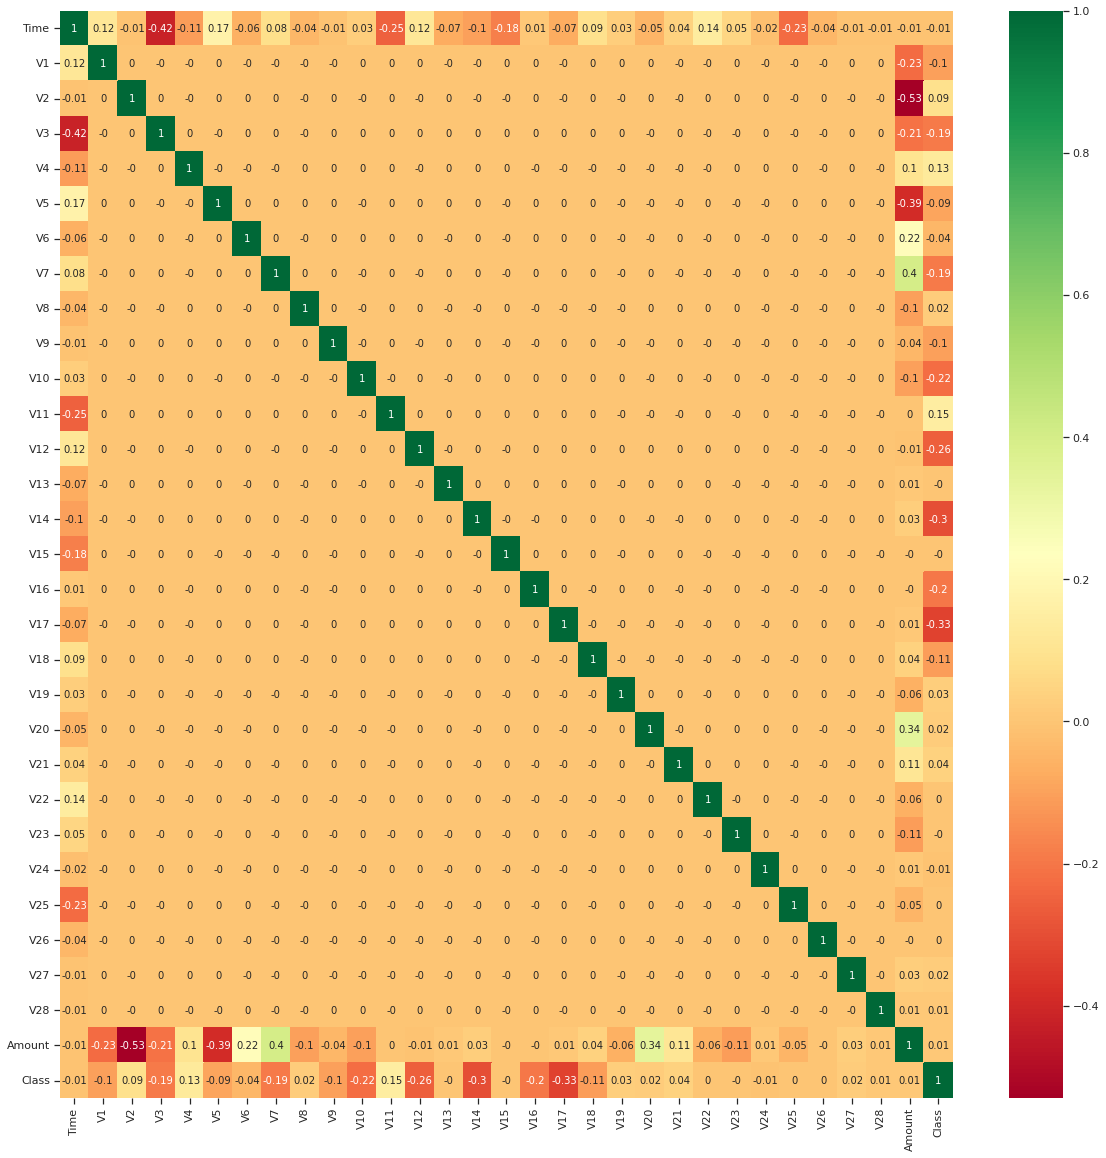

In [39]:
corr_df = df
cor = corr_df.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(cor, cmap="RdYlGn", annot=True)
plt.savefig('correlation.jpeg')
plt.show()

### observe the distribution of our classes

In [40]:
classes=df['Class'].value_counts()

### Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

  0%|          | 0/2 [00:00<?, ?it/s]

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

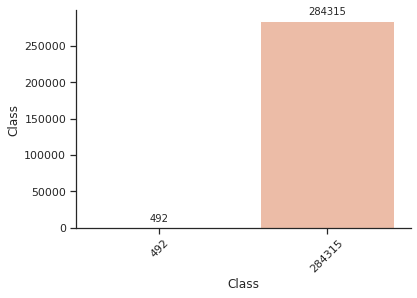

In [41]:
splot = sns.barplot(x=df['Class'].value_counts(), y=df['Class'].value_counts(),  data=df,  ci=None,  capsize=.2, palette='coolwarm')

for p in tqdm(splot.patches):
    splot.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
plt.xticks(rotation=45)

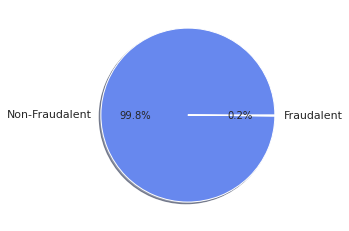

In [42]:
# ('Distribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()
fraud_share=classes[1]/df['Class'].count()


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]

colors = sns.color_palette('coolwarm')[0:5]

#create pie chart
plt.pie(sizes, labels = labels, autopct='%.1f%%', colors=colors ,shadow=True)
plt.show()

### scatter plot to observe the distribution of classes with time

In [43]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create Feature Columns to derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

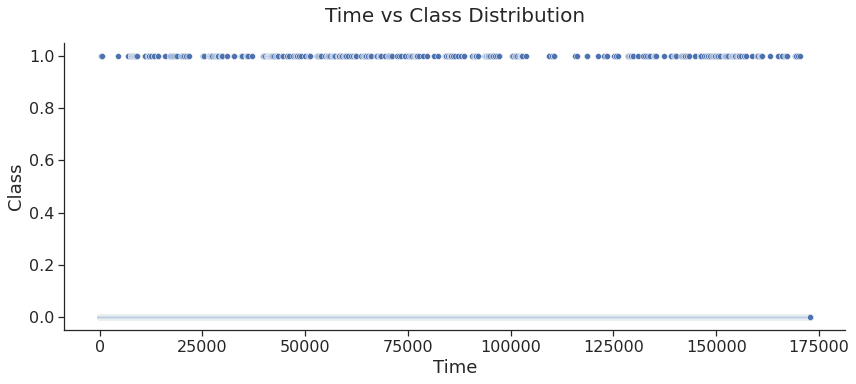

In [44]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# Plot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

### Create a scatter plot to observe the distribution of classes with Amount

Text(0.5, 1.05, 'Amount vs Class Distribution')

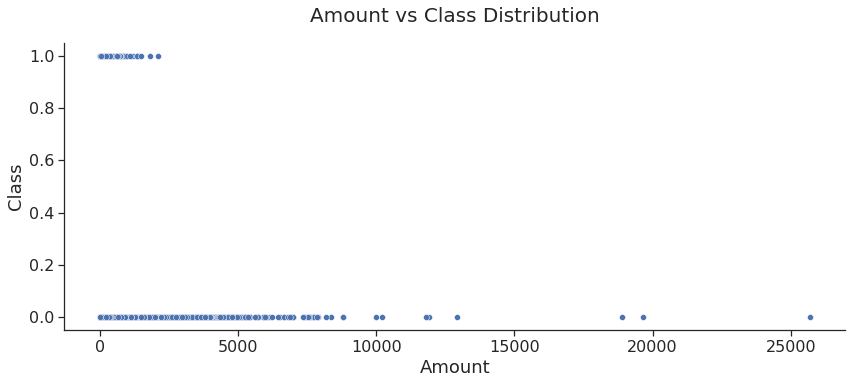

In [45]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

### Drop unnecessary columns

In [46]:
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

# Splitting the data into train & test data

In [47]:
y= df['Class']
X = df.drop(['Class'], axis=1)

In [48]:
# Using stratify=y for splitting data into stratified fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=random_seed)

In [49]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Plotting the distribution of a variable

In [50]:
cols = list(X.columns.values)


0it [00:00, ?it/s]

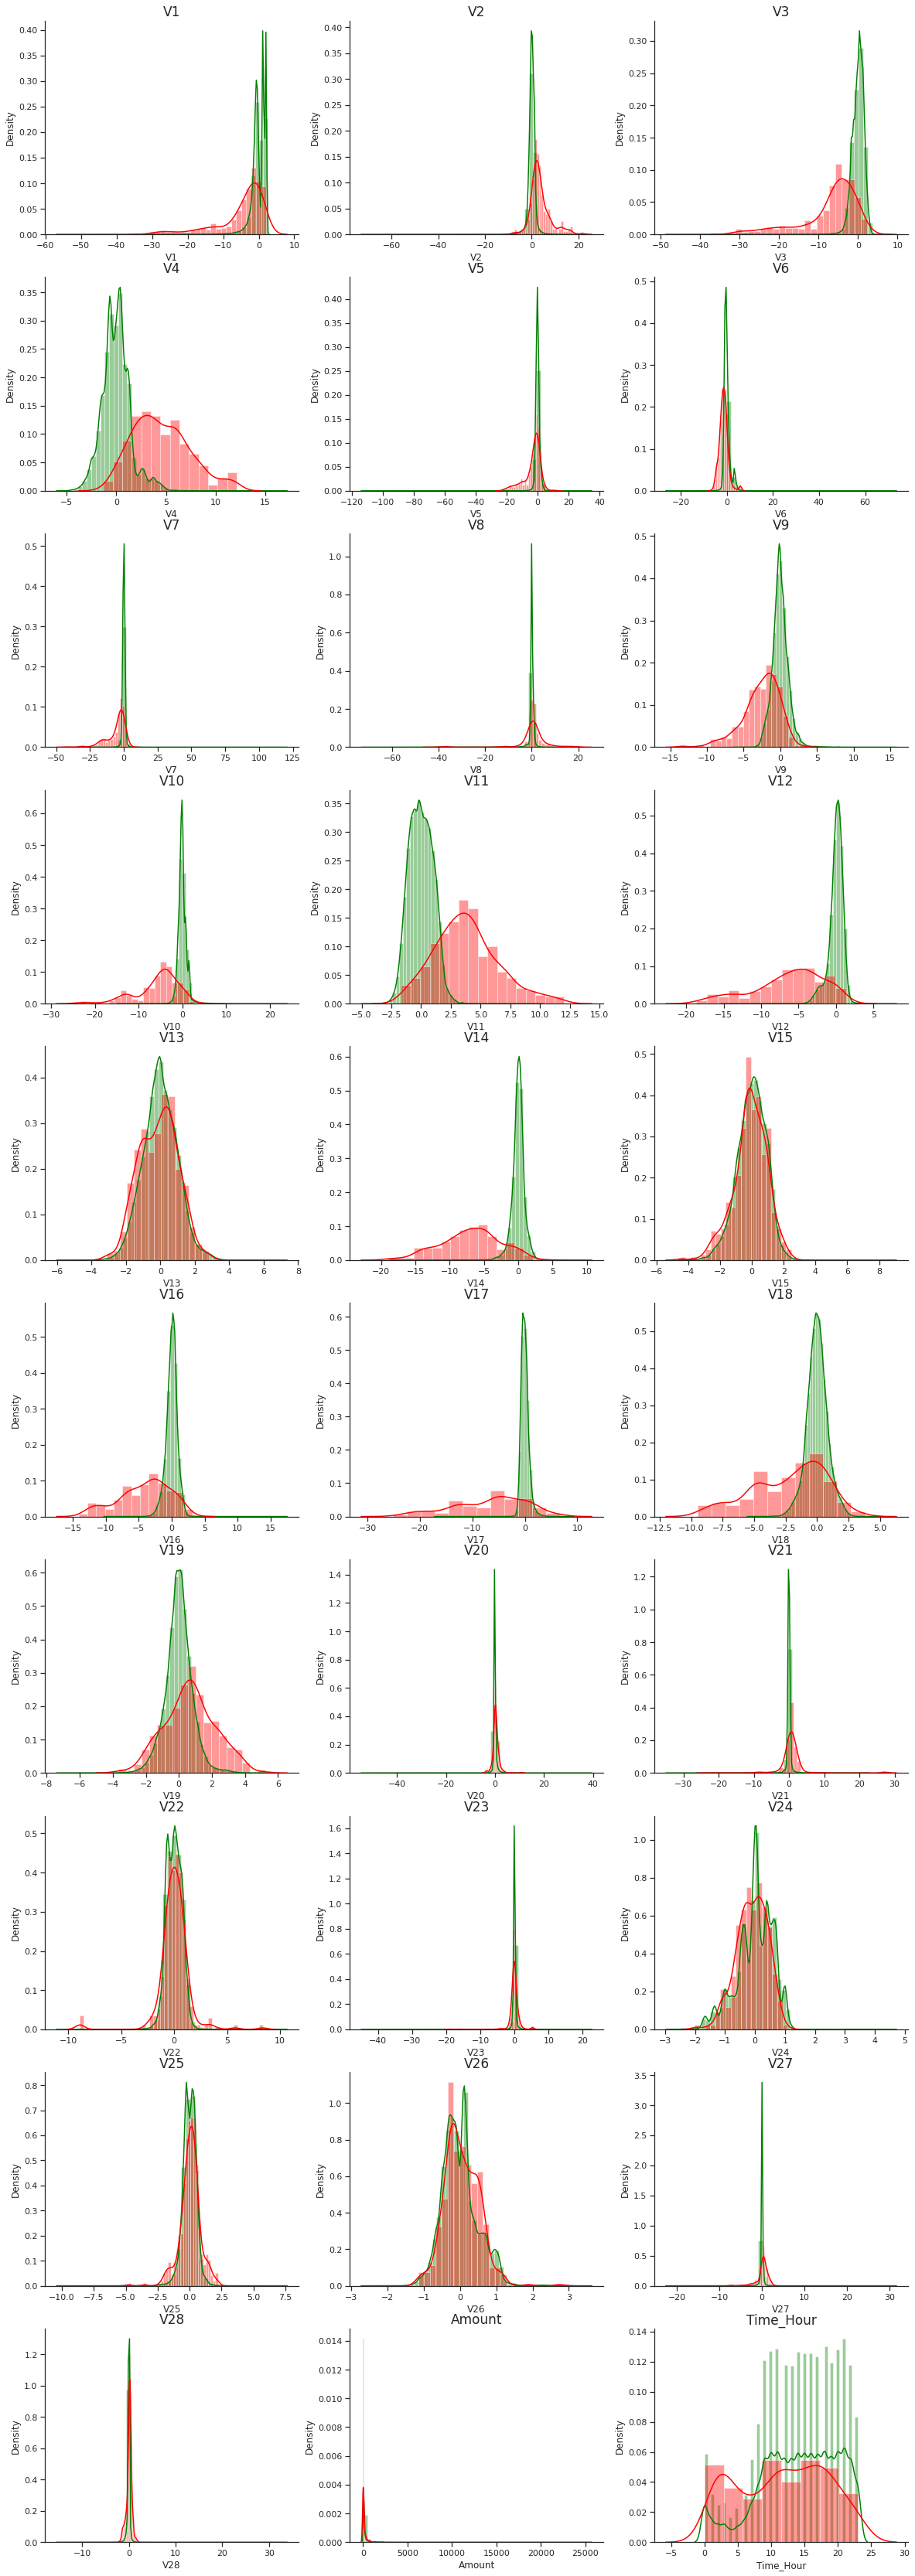

In [51]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in tqdm(enumerate(cols)):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [52]:
# Skewness in data to filter the values which are beyond
# -0.5 and +0.5 to calculate skewness in a variable
skewness = df[cols].skew()

In [53]:
# Subset of columns  with below condition
columns = skewness[(skewness < -0.5) | (skewness > 0.5)].index

In [54]:
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12',
       'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

### Using PowerTransformer for Apply a power transform featurewise to make

In [55]:
# data more Gaussian-like for both X_train and X_test
power = PowerTransformer()
X_train[columns] = power.fit_transform(X_train[columns])
X_test[columns] = power.fit_transform(X_test[columns])

### plot the histogram of a variable from the dataset after power transformation

  0%|          | 0/29 [00:00<?, ?it/s]

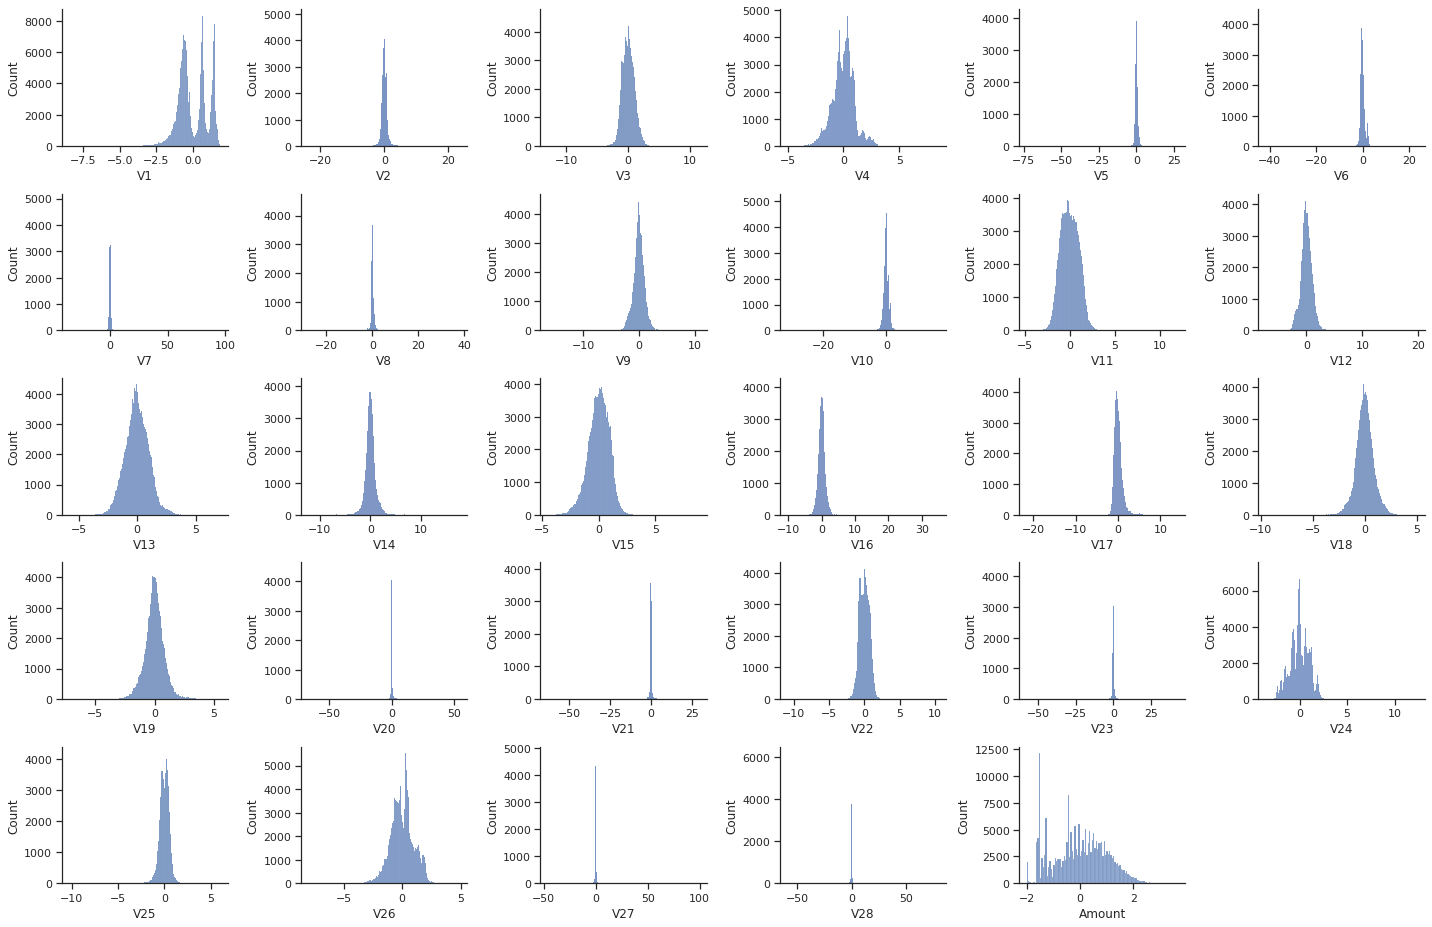

In [56]:
plt.figure(figsize=(20, 15))
for i in tqdm(range(1, 30)):
    plt.subplot(6, 6, i)
    sns.histplot(X_train.iloc[:, i-1])
plt.tight_layout()
plt.show(block=False)

### Create model

In [57]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [58]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
  # https://matplotlib.org/stable/tutorials/colors/colormaps.html
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=14)
  plt.show()

In [65]:
def Run_DecisionTreeClassifier(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'

  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=random_seed) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [66]:
def Run_RandomForestClassifier(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model



  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=random_seed)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [87]:
def Run_XGBClassifier(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=random_seed, nthread=no_of_treads)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
  

### Model Building

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991573270413753
Confusion Matrix


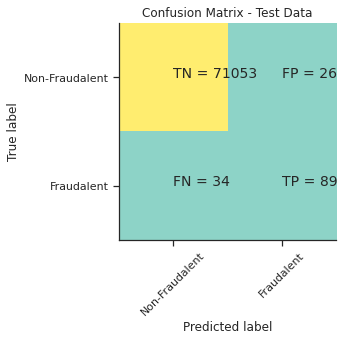

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.72      0.75       123

    accuracy                           1.00     71202
   macro avg       0.89      0.86      0.87     71202
weighted avg       1.00      1.00      1.00     71202

gini tree_roc_value: 0.8616057227976155
Tree threshold: 1.0
ROC for the test dataset 86.2%


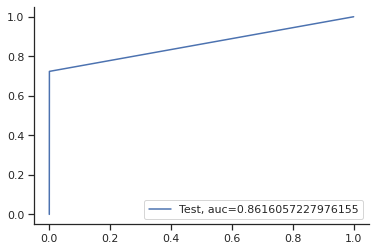

entropy score: 0.9990871042948232
Confusion Matrix


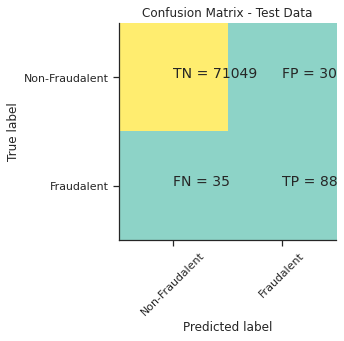

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.75      0.72      0.73       123

    accuracy                           1.00     71202
   macro avg       0.87      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202

entropy tree_roc_value: 0.857512544441276
Tree threshold: 1.0
ROC for the test dataset 85.8%


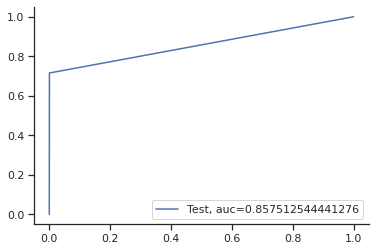

Time Taken by Model: --- 34.52710723876953 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 34.5 s, sys: 25.2 ms, total: 34.5 s
Wall time: 34.5 s


In [70]:
%%time
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = Run_DecisionTreeClassifier(df_Results,"Power Transformer",X_train,y_train, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Random Forest Model
Model Accuracy: 0.9995646189713772
Confusion Matrix


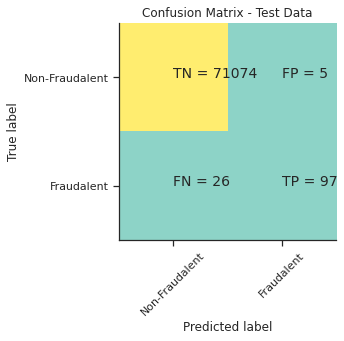

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Random Forest roc_value: 0.9415172079800821
Random Forest threshold: 0.03
ROC for the test dataset 94.2%


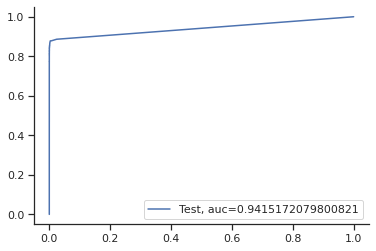

Time Taken by Model: --- 176.2181990146637 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 2min 56s, sys: 139 ms, total: 2min 56s
Wall time: 2min 56s


In [72]:
%%time
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = Run_RandomForestClassifier(df_Results,"Power Transformer",X_train,y_train, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


XGBoost Model
Model Accuracy: 0.9994663071262043
Confusion Matrix


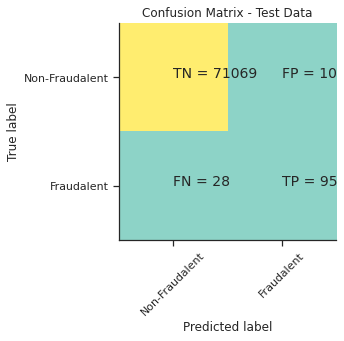

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.77      0.83       123

    accuracy                           1.00     71202
   macro avg       0.95      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

XGboost roc_value: 0.9714081446305538
XGBoost threshold: 0.0016986568225547671
ROC for the test dataset 97.1%


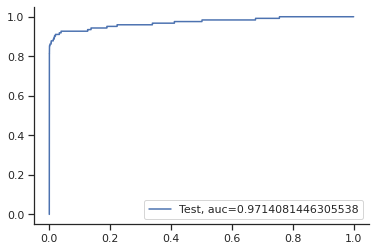

Time Taken by Model: --- 45.244582176208496 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 44.8 s, sys: 285 ms, total: 45.1 s
Wall time: 45.2 s


In [73]:
%%time
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBClassifier(df_Results,"Power Transformer",X_train,y_train, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


In [74]:
%%time
df_Results.sort_values(by='Accuracy', ascending=False)

CPU times: user 1.28 ms, sys: 8 µs, total: 1.29 ms
Wall time: 1.22 ms


,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
2,Power Transformer,Random Forest,0.999565,0.941517,0.030000
3,Power Transformer,XGBoost,0.999466,0.971408,0.001699
0,Power Transformer,Tree Model with gini criteria,0.999157,0.861606,1.000000
1,Power Transformer,Tree Model with entropy criteria,0.999087,0.857513,1.000000


### Perform cross validation with RepeatedKFold


In [75]:
%%time
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in tqdm(rkf.split(X,y)):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

0it [00:00, ?it/s]

TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      6     13 ... 284782 284789 284793]
TRAIN: [     1      2      4 ... 284802 284803 284805] TEST: [     0      3     12 ... 284801 284804 284806]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      4      8 ... 284786 284790 284791]
TRAIN: [     0      1      2 ... 284802 284804 284806] TEST: [     7     16     19 ... 284792 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      9     10 ... 284799 284800 284802]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     4      6      8 ... 284794 284800 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    13     22     24 ... 284774 284781 284803]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2     10     12 ... 284799 284801 284802]
TRAIN: [     0      2      4 ... 284803 284805 284806] TEST: [     1      3      7 ... 284796 284797 284804]
TRAIN: [     1     

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992099857797441
Confusion Matrix


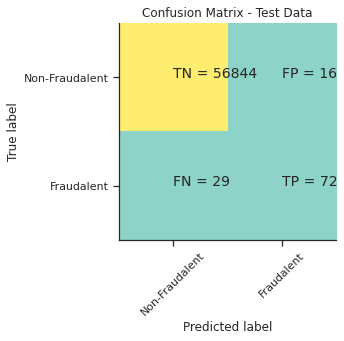

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.82      0.71      0.76       101

    accuracy                           1.00     56961
   macro avg       0.91      0.86      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8562949471169418
Tree threshold: 1.0
ROC for the test dataset 85.6%


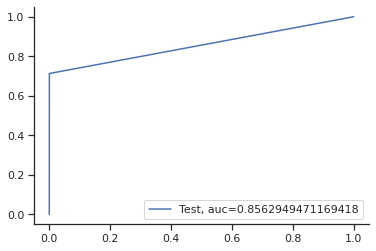

entropy score: 0.9990168711925703
Confusion Matrix


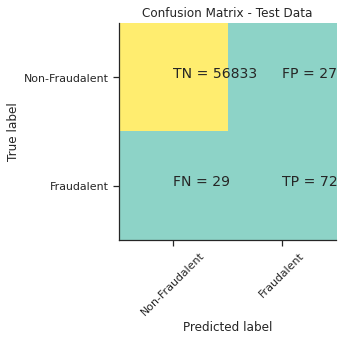

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.73      0.71      0.72       101

    accuracy                           1.00     56961
   macro avg       0.86      0.86      0.86     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8561982183093442
Tree threshold: 1.0
ROC for the test dataset 85.6%


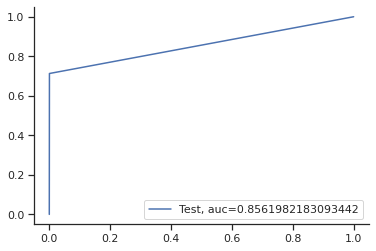

Time Taken by Model: --- 29.957813501358032 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 29.9 s, sys: 30 ms, total: 30 s
Wall time: 30 s


In [76]:
%%time
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = Run_DecisionTreeClassifier(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Random Forest Model
Model Accuracy: 0.9995435473394076
Confusion Matrix


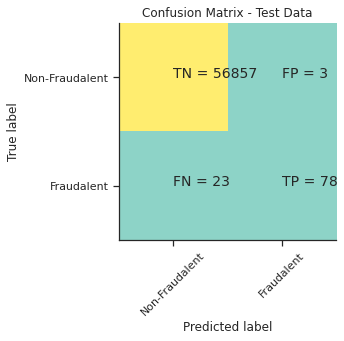

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.96      0.77      0.86       101

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9338192120302427
Random Forest threshold: 0.12
ROC for the test dataset 93.4%


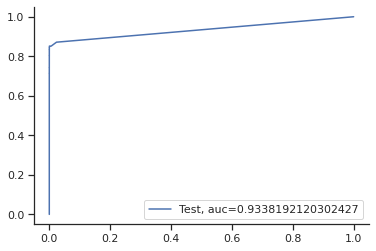

Time Taken by Model: --- 179.99300336837769 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 3min, sys: 180 ms, total: 3min
Wall time: 2min 59s


In [77]:
%%time
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = Run_RandomForestClassifier(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


XGBoost Model
Model Accuracy: 0.9995786590825302
Confusion Matrix


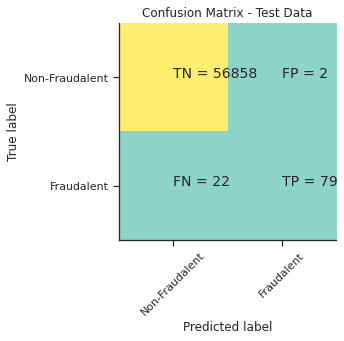

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.98      0.78      0.87       101

    accuracy                           1.00     56961
   macro avg       0.99      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9792260302358058
XGBoost threshold: 0.0017778676701709628
ROC for the test dataset 97.9%


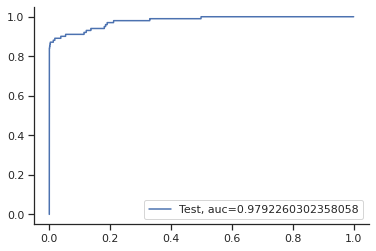

Time Taken by Model: --- 48.415380001068115 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 48.3 s, sys: 101 ms, total: 48.4 s
Wall time: 48.4 s


In [78]:
%%time
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBClassifier(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


In [79]:
%%time
df_Results.sort_values(by='Accuracy', ascending=False)

CPU times: user 967 µs, sys: 1 µs, total: 968 µs
Wall time: 864 µs


,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
7,RepeatedKFold Cross Validation,XGBoost,0.999579,0.979226,0.001778
2,Power Transformer,Random Forest,0.999565,0.941517,0.030000
6,RepeatedKFold Cross Validation,Random Forest,0.999544,0.933819,0.120000
3,Power Transformer,XGBoost,0.999466,0.971408,0.001699
4,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.856295,1.000000
0,Power Transformer,Tree Model with gini criteria,0.999157,0.861606,1.000000
1,Power Transformer,Tree Model with entropy criteria,0.999087,0.857513,1.000000
5,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999017,0.856198,1.000000


### XGBoost using Repeated KFold Cross Validation having Best Results

In [81]:
%%time
# fit model no training data
XGBmodel = XGBClassifier(random_state=random_seed)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

CPU times: user 47.1 s, sys: 75.1 ms, total: 47.2 s
Wall time: 47 s


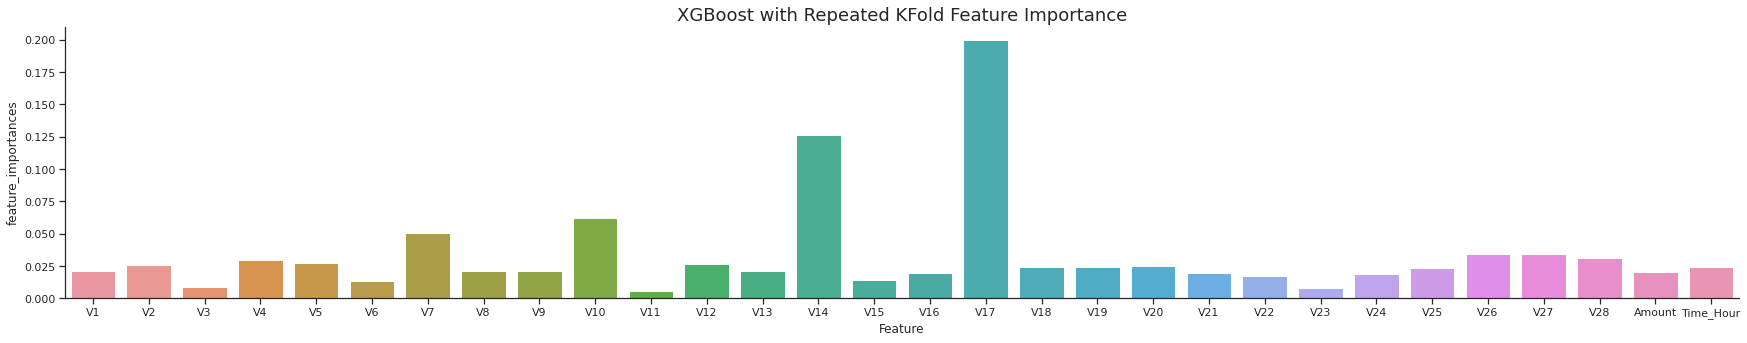

CPU times: user 365 ms, sys: 16.2 ms, total: 381 ms
Wall time: 370 ms


In [84]:
%%time
plt.figure(figsize=(30,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

### Perform cross validation with StratifiedKFold

In [85]:
%%time
#Lets perfrom StratifiedKFold and check the results

skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in tqdm(skf.split(X,y)):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

0it [00:00, ?it/s]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]
CPU times: user 206 ms, sys: 34.2 ms, total: 240 ms
Wall time: 231 ms


Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


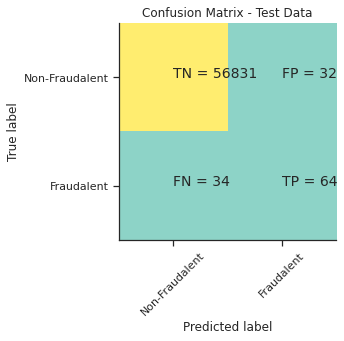

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


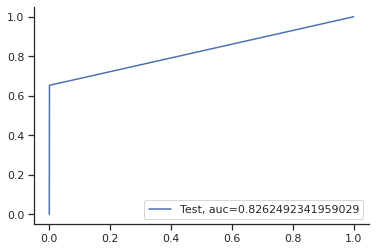

entropy score: 0.9990168711925703
Confusion Matrix


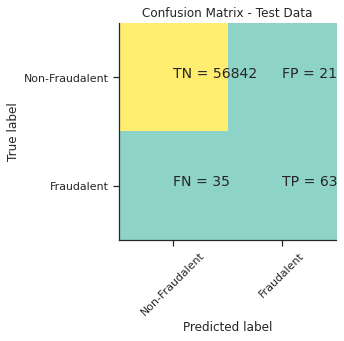

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


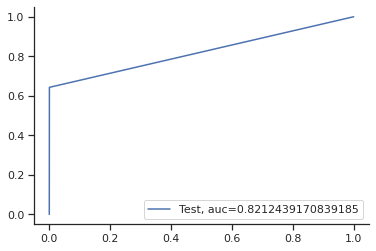

Time Taken by Model: --- 31.310466289520264 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 31 s, sys: 57.5 ms, total: 31 s
Wall time: 31.3 s


In [90]:
%%time
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = Run_DecisionTreeClassifier(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


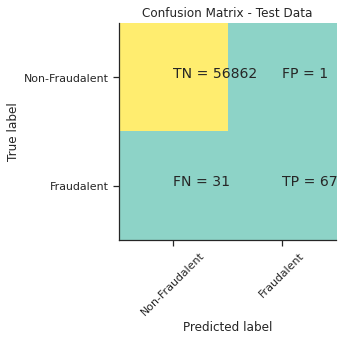

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


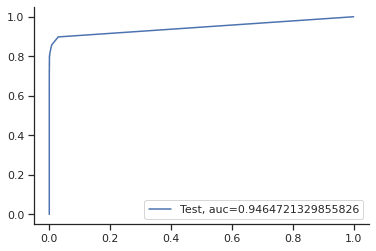

Time Taken by Model: --- 174.08355450630188 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 2min 54s, sys: 195 ms, total: 2min 54s
Wall time: 2min 54s


In [91]:
%%time
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = Run_RandomForestClassifier(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


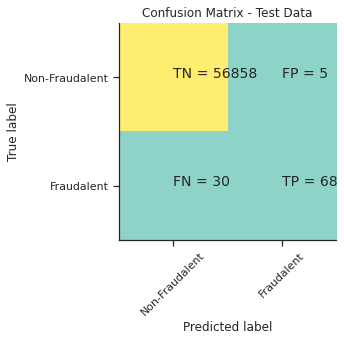

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.69      0.80        98

    accuracy                           1.00     56961
   macro avg       0.97      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9781480694558744
XGBoost threshold: 0.0024432227946817875
ROC for the test dataset 97.8%


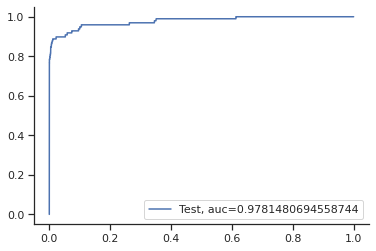

Time Taken by Model: --- 23.07416296005249 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 1min 14s, sys: 278 ms, total: 1min 14s
Wall time: 23.1 s


In [89]:
%%time
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBClassifier(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


In [93]:
%%time
df_Results.sort_values(by='Accuracy', ascending=False)

CPU times: user 757 µs, sys: 0 ns, total: 757 µs
Wall time: 701 µs


,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
7,RepeatedKFold Cross Validation,XGBoost,0.999579,0.979226,0.001778
2,Power Transformer,Random Forest,0.999565,0.941517,0.030000
6,RepeatedKFold Cross Validation,Random Forest,0.999544,0.933819,0.120000
3,Power Transformer,XGBoost,0.999466,0.971408,0.001699
11,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
8,StratifiedKFold Cross Validation,XGBoost,0.999386,0.978148,0.002443
4,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.856295,1.000000
0,Power Transformer,Tree Model with gini criteria,0.999157,0.861606,1.000000
1,Power Transformer,Tree Model with entropy criteria,0.999087,0.857513,1.000000
5,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999017,0.856198,1.000000


### Models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [94]:
%%time
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

CPU times: user 69.7 ms, sys: 4.99 ms, total: 74.7 ms
Wall time: 73.1 ms


Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9508581219628662
Confusion Matrix


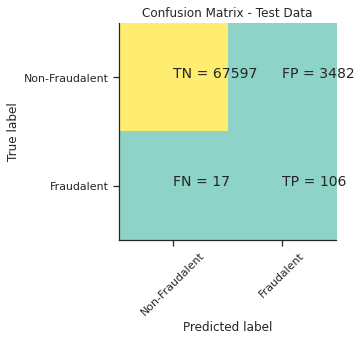

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.86      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.91      0.52     71202
weighted avg       1.00      0.95      0.97     71202

gini tree_roc_value: 0.9064004359285563
Tree threshold: 1.0
ROC for the test dataset 90.6%


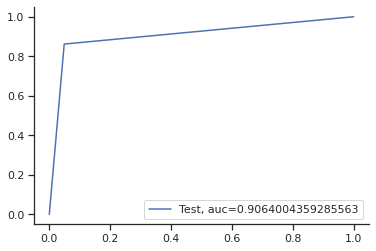

entropy score: 0.9348052021010645
Confusion Matrix


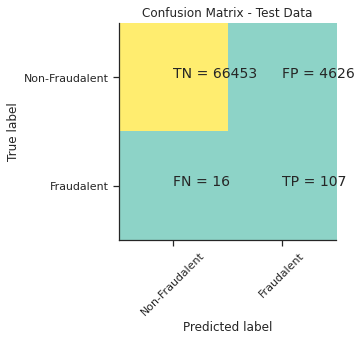

classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     71079
           1       0.02      0.87      0.04       123

    accuracy                           0.93     71202
   macro avg       0.51      0.90      0.51     71202
weighted avg       1.00      0.93      0.96     71202

entropy tree_roc_value: 0.9024180926821718
Tree threshold: 1.0
ROC for the test dataset 90.2%


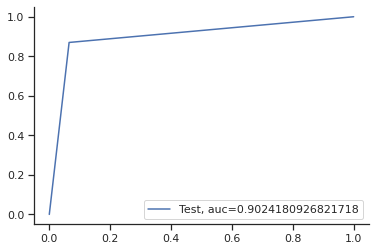

Time Taken by Model: --- 0.7958436012268066 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 790 ms, sys: 20.1 ms, total: 810 ms
Wall time: 797 ms


In [95]:
%%time
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = Run_DecisionTreeClassifier(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Random Forest Model
Model Accuracy: 0.9875143956630432
Confusion Matrix


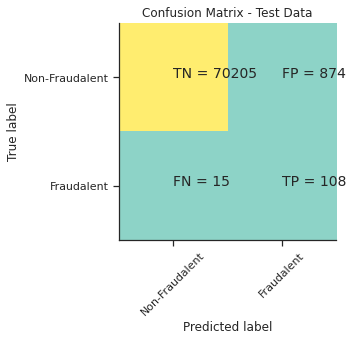

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.11      0.88      0.20       123

    accuracy                           0.99     71202
   macro avg       0.55      0.93      0.59     71202
weighted avg       1.00      0.99      0.99     71202

Random Forest roc_value: 0.9764939777874544
Random Forest threshold: 0.49
ROC for the test dataset 97.6%


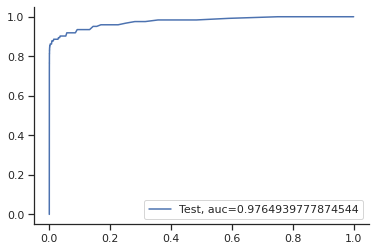

Time Taken by Model: --- 3.1661629676818848 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 2.96 s, sys: 23 ms, total: 2.98 s
Wall time: 3.17 s


In [96]:
%%time
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = Run_RandomForestClassifier(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


XGBoost Model
Model Accuracy: 0.9838347237437151
Confusion Matrix


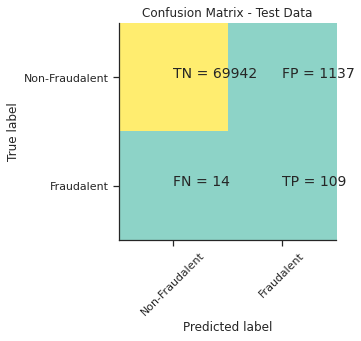

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.89      0.16       123

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.58     71202
weighted avg       1.00      0.98      0.99     71202

XGboost roc_value: 0.9809912067381341
XGBoost threshold: 0.45976147055625916
ROC for the test dataset 98.1%


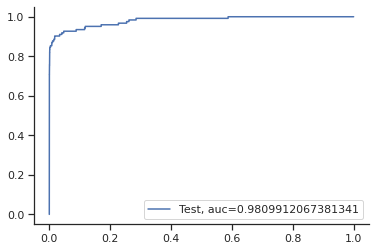

Time Taken by Model: --- 0.9217972755432129 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 1.64 s, sys: 109 ms, total: 1.75 s
Wall time: 923 ms


In [97]:
%%time
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBClassifier(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


In [98]:
%%time
df_Results.sort_values(by='Accuracy', ascending=False)


CPU times: user 749 µs, sys: 999 µs, total: 1.75 ms
Wall time: 1.43 ms


,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
7,RepeatedKFold Cross Validation,XGBoost,0.999579,0.979226,0.001778
2,Power Transformer,Random Forest,0.999565,0.941517,0.030000
6,RepeatedKFold Cross Validation,Random Forest,0.999544,0.933819,0.120000
3,Power Transformer,XGBoost,0.999466,0.971408,0.001699
11,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
8,StratifiedKFold Cross Validation,XGBoost,0.999386,0.978148,0.002443
4,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.856295,1.000000
0,Power Transformer,Tree Model with gini criteria,0.999157,0.861606,1.000000
1,Power Transformer,Tree Model with entropy criteria,0.999087,0.857513,1.000000
5,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999017,0.856198,1.000000


#--- BLANK --- 

# ------------------------------------------------------------------------------

### Model building with balancing Classes
Perform class balancing with :
Random Oversampling
SMOTE
ADASYN

### Oversampling with RandomOverSampler and StratifiedKFold Cross Validation
We will use Random Oversampling method to handle the class imbalance

First we will display class distibution with and without the Random Oversampling.

Then We will use the oversampled with StratifiedKFold cross validation method to generate Train And Test datasets.

Once we have train and test dataset we will feed the data to below models:

Decision tree model with Gini criteria
Decision tree model with Entropy criteria
Random Forest
XGBoost

Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [99]:
%%time
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in tqdm(enumerate(skf.split(X,y), 1)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

0it [00:00, ?it/s]

CPU times: user 1.28 s, sys: 122 ms, total: 1.41 s
Wall time: 1.38 s


In [100]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990168711925703
Confusion Matrix


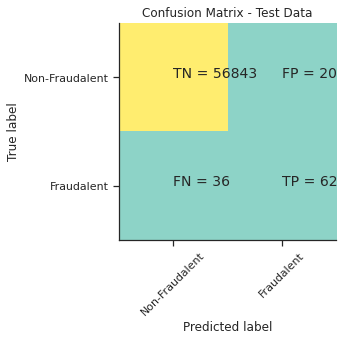

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.63      0.69        98

    accuracy                           1.00     56961
   macro avg       0.88      0.82      0.84     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8161506693316231
Tree threshold: 1.0
ROC for the test dataset 81.6%


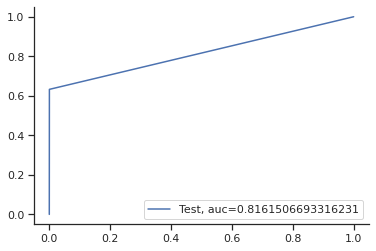

entropy score: 0.9992099857797441
Confusion Matrix


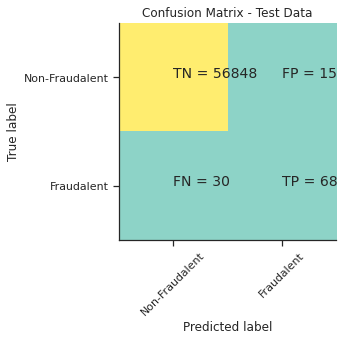

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.69      0.75        98

    accuracy                           1.00     56961
   macro avg       0.91      0.85      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8468068795497377
Tree threshold: 1.0
ROC for the test dataset 84.7%


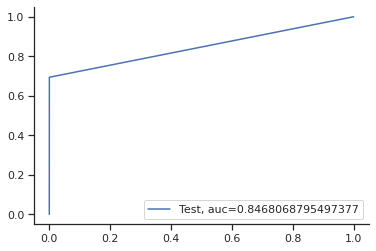

Time Taken by Model: --- 22.732728481292725 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 22.8 s, sys: 47.3 ms, total: 22.9 s
Wall time: 22.7 s


In [101]:
%%time

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = Run_DecisionTreeClassifier(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


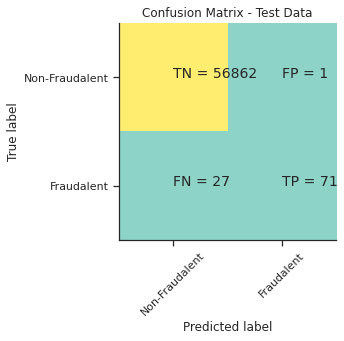

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9460905319516618
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


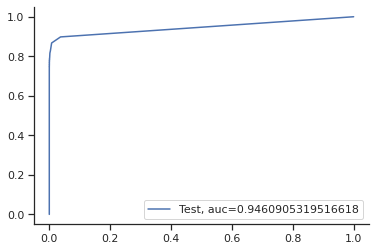

Time Taken by Model: --- 140.07431077957153 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 2min 20s, sys: 196 ms, total: 2min 20s
Wall time: 2min 20s


In [102]:
%%time

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = Run_RandomForestClassifier(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


XGBoost Model
Model Accuracy: 0.9964537139446288
Confusion Matrix


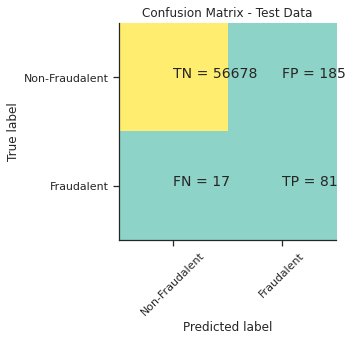

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.30      0.83      0.45        98

    accuracy                           1.00     56961
   macro avg       0.65      0.91      0.72     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9829192936693169
XGBoost threshold: 0.20879508554935455
ROC for the test dataset 98.3%


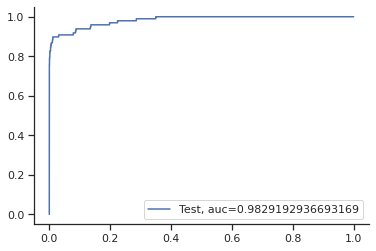

Time Taken by Model: --- 26.595257997512817 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 1min 38s, sys: 342 ms, total: 1min 38s
Wall time: 26.6 s


In [103]:
%%time

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBClassifier(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


In [104]:
%%time
df_Results.sort_values(by='Accuracy', ascending=False)

CPU times: user 1.78 ms, sys: 0 ns, total: 1.78 ms
Wall time: 1.54 ms


,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
7,RepeatedKFold Cross Validation,XGBoost,0.999579,0.979226,0.001778
2,Power Transformer,Random Forest,0.999565,0.941517,0.030000
6,RepeatedKFold Cross Validation,Random Forest,0.999544,0.933819,0.120000
18,Random Oversampling with StratifiedKFold CV,Random Forest,0.999508,0.946091,0.010000
3,Power Transformer,XGBoost,0.999466,0.971408,0.001699
11,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
8,StratifiedKFold Cross Validation,XGBoost,0.999386,0.978148,0.002443
4,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.856295,1.000000
17,Random Oversampling with StratifiedKFold CV,Tree Model with entropy criteria,0.999210,0.846807,1.000000
0,Power Transformer,Tree Model with gini criteria,0.999157,0.861606,1.000000


-------------------------

### Oversampling with SMOTE Oversamplng
We will use SMOTE Oversampling method to handle the class imbalance

First we will display class distibution with and without the SMOTE Oversampling.

Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

Decision tree model with Gini criteria
Decision tree model with Entropy criteria
Random Forest
XGBoost

Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE

In [105]:
%%time
SMOTE = over_sampling.SMOTE(random_state=0)

CPU times: user 35 µs, sys: 1 µs, total: 36 µs
Wall time: 41.2 µs


CPU times: user 535 ms, sys: 318 ms, total: 853 ms
Wall time: 578 ms


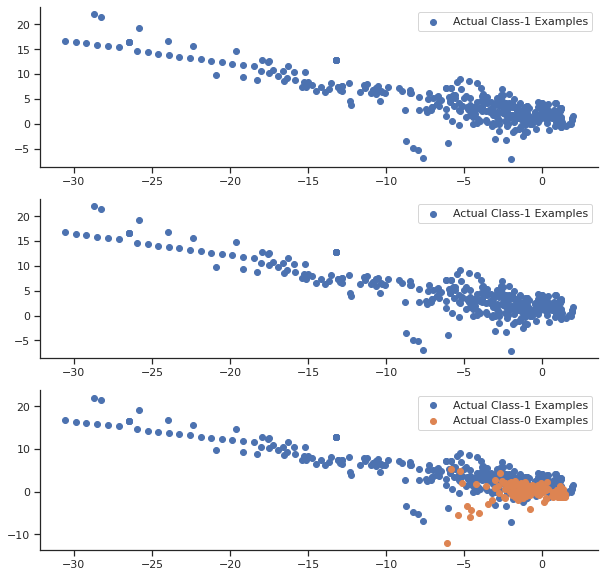

In [106]:
%%time
X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train) 

#Create dataframe

X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
#            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [107]:
%%time
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in tqdm(enumerate(skf.split(X,y), 1)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

0it [00:00, ?it/s]

CPU times: user 2.2 s, sys: 1.27 s, total: 3.48 s
Wall time: 2.25 s


In [108]:
%%time
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [109]:
plt.rcParams['figure.figsize'] = [5, 5]

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


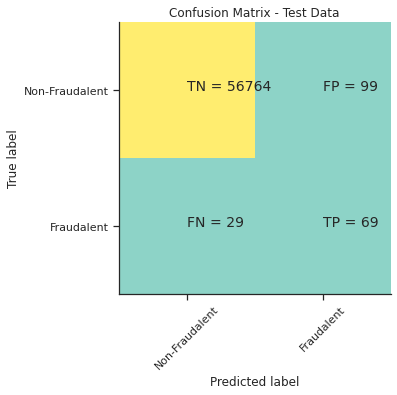

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


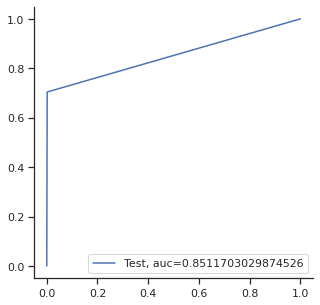

entropy score: 0.9969803900914661
Confusion Matrix


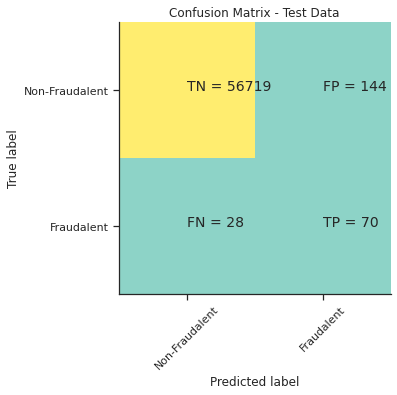

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


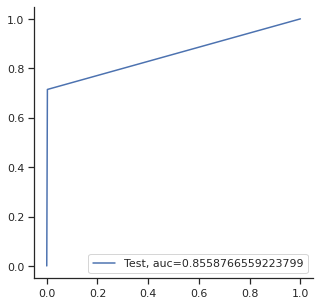

Time Taken by Model: --- 71.62440323829651 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 1min 11s, sys: 79.9 ms, total: 1min 11s
Wall time: 1min 11s


In [110]:
%%time
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = Run_DecisionTreeClassifier(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


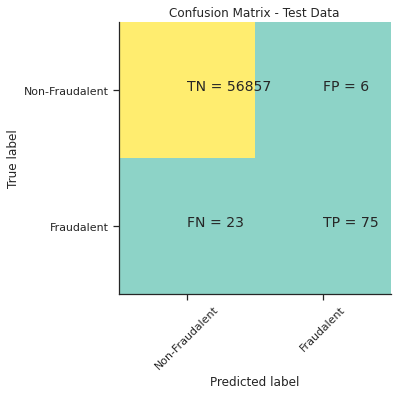

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


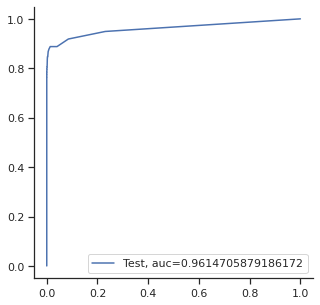

Time Taken by Model: --- 321.82486367225647 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 5min 22s, sys: 357 ms, total: 5min 22s
Wall time: 5min 21s


In [111]:
%%time
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = Run_RandomForestClassifier(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


XGBoost Model
Model Accuracy: 0.9934165481645336
Confusion Matrix


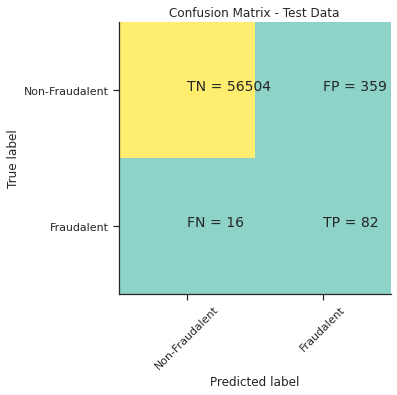

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.19      0.84      0.30        98

    accuracy                           0.99     56961
   macro avg       0.59      0.92      0.65     56961
weighted avg       1.00      0.99      1.00     56961

XGboost roc_value: 0.9763188429619777
XGBoost threshold: 0.2766454517841339
ROC for the test dataset 97.6%


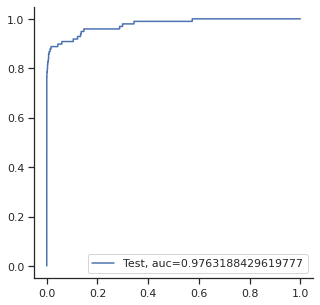

Time Taken by Model: --- 44.018720865249634 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 2min 45s, sys: 377 ms, total: 2min 46s
Wall time: 44 s


In [112]:
%%time
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBClassifier(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Build models on other algorithms to see the better performing on SMOTE

In [114]:
%%time
df_Results.sort_values(by='roc_value', ascending=False)

CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.31 ms


,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
19,Random Oversampling with StratifiedKFold CV,XGBoost,0.996454,0.982919,0.208795
15,Random Undersampling,XGBoost,0.983835,0.980991,0.459761
7,RepeatedKFold Cross Validation,XGBoost,0.999579,0.979226,0.001778
8,StratifiedKFold Cross Validation,XGBoost,0.999386,0.978148,0.002443
14,Random Undersampling,Random Forest,0.987514,0.976494,0.490000
23,SMOTE Oversampling with StratifiedKFold CV,XGBoost,0.993417,0.976319,0.276645
3,Power Transformer,XGBoost,0.999466,0.971408,0.001699
22,SMOTE Oversampling with StratifiedKFold CV,Random Forest,0.999491,0.961471,0.050000
11,StratifiedKFold Cross Validation,Random Forest,0.999438,0.946472,0.010000
18,Random Oversampling with StratifiedKFold CV,Random Forest,0.999508,0.946091,0.010000


### Results for SMOTE Oversampling:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling with StratifiedKFold CV , while SMOTE oversampling technique is also performed better.

### Oversampling with ADASYN Oversampling
We will use ADASYN Oversampling method to handle the class imbalance

First we will display class distibution with and without the ADASYN Oversampling.

Then we will use the oversampled with StratifiedKFold cross validation method to genearte Train And Test datasets.

Once we have train and test dataset we will feed the data to below models:

Decision tree model with Gini criteria
Decision tree model with Entropy criteria
Random Forest
XGBoost

Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique

CPU times: user 2.45 s, sys: 989 ms, total: 3.44 s
Wall time: 2.3 s


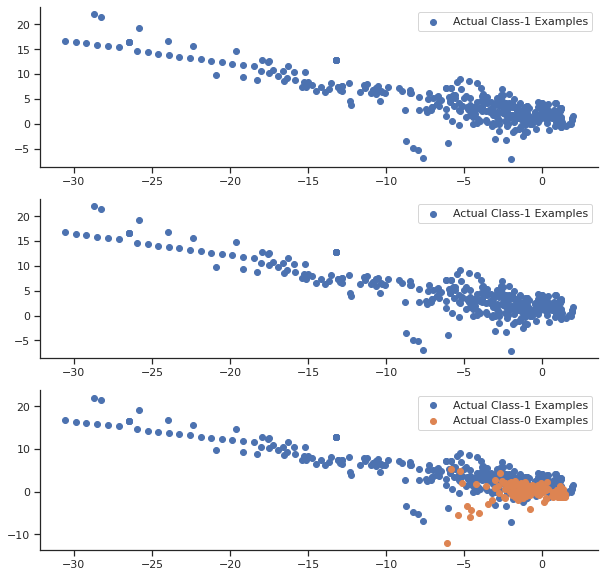

In [115]:
%%time
ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
#            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [116]:
%%time
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in tqdm(enumerate(skf.split(X,y), 1)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

0it [00:00, ?it/s]

CPU times: user 11.6 s, sys: 3.48 s, total: 15.1 s
Wall time: 9.81 s


Build models on other algorithms to see the better performing on ADASYN


In [117]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979459630273345
Confusion Matrix


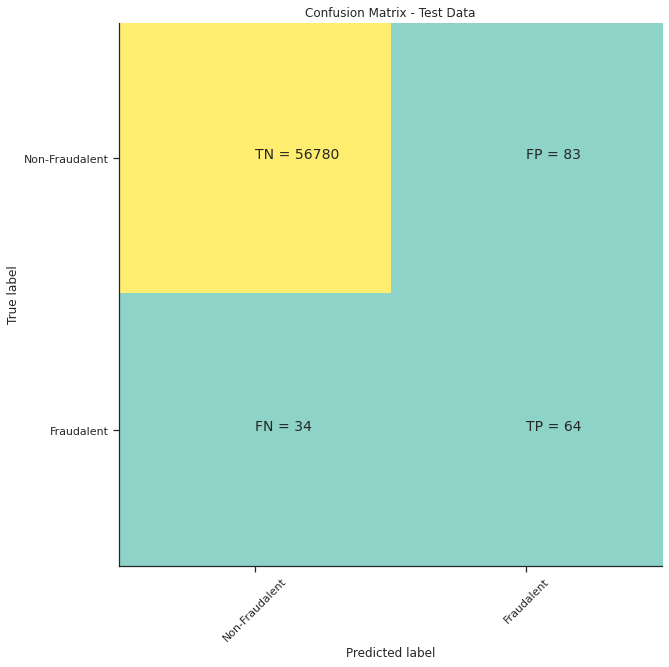

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


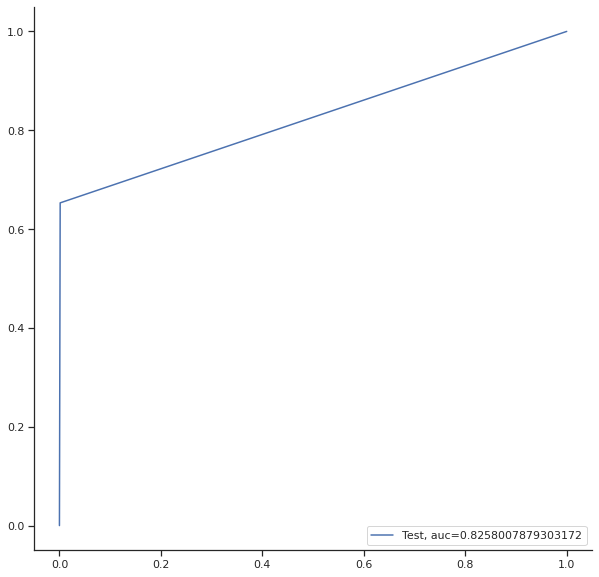

entropy score: 0.9954179175225154
Confusion Matrix


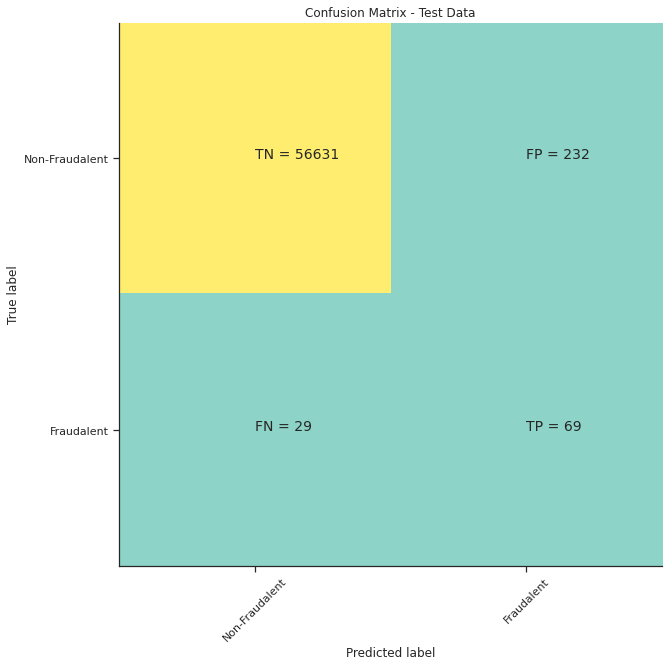

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8500008254713172
Tree threshold: 1.0
ROC for the test dataset 85.0%


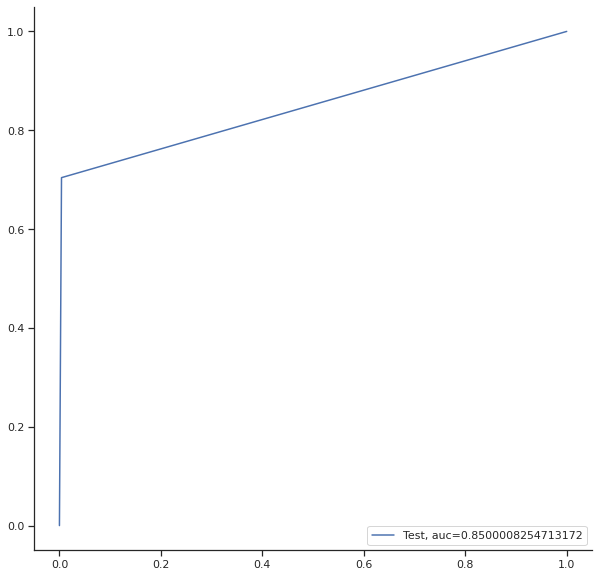

Time Taken by Model: --- 74.30541563034058 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 1min 14s, sys: 97.4 ms, total: 1min 14s
Wall time: 1min 14s


In [118]:
%%time
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = Run_DecisionTreeClassifier(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


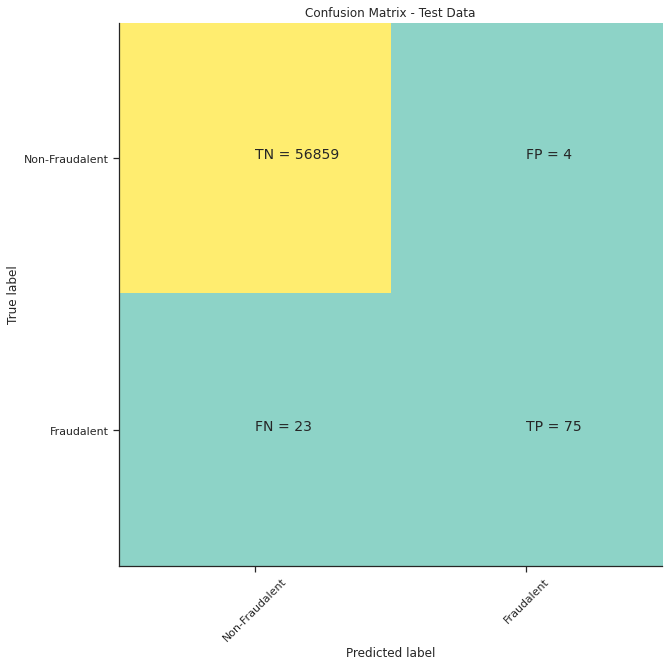

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


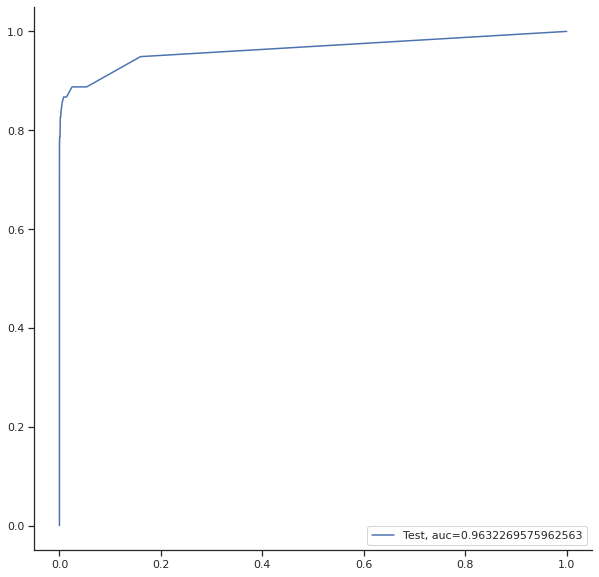

Time Taken by Model: --- 332.04367566108704 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 5min 33s, sys: 375 ms, total: 5min 33s
Wall time: 5min 32s


In [119]:
%%time
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = Run_RandomForestClassifier(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


XGBoost Model
Model Accuracy: 0.9858675233931988
Confusion Matrix


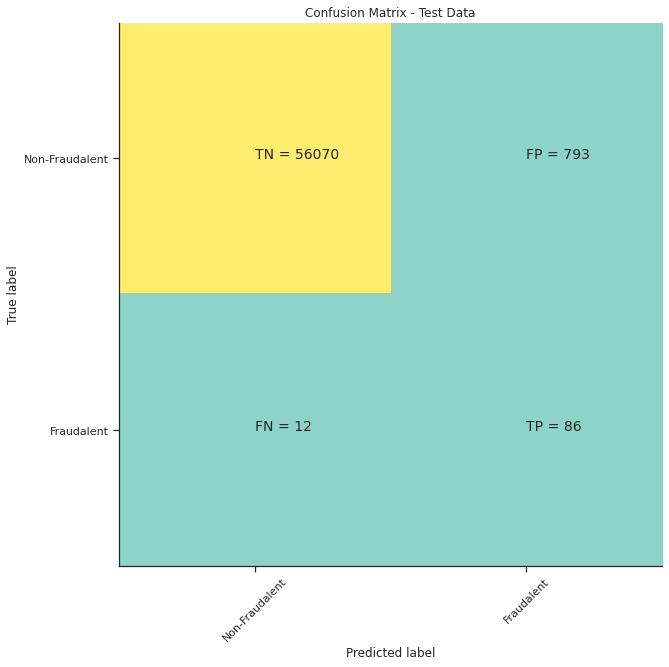

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.88      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

XGboost roc_value: 0.9783021275267049
XGBoost threshold: 0.5225471258163452
ROC for the test dataset 97.8%


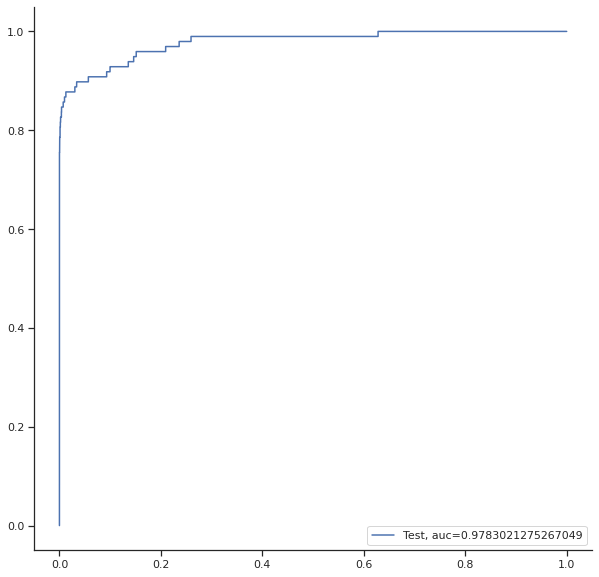

Time Taken by Model: --- 44.29352259635925 seconds ---
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CPU times: user 2min 46s, sys: 293 ms, total: 2min 47s
Wall time: 44.3 s


In [120]:
%%time
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = Run_XGBClassifier(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('+'*100 )


In [122]:
%%time
df_Results.sort_values(by='roc_value', ascending=False)

CPU times: user 1.41 ms, sys: 4 µs, total: 1.42 ms
Wall time: 1.33 ms


,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
19,Random Oversampling with StratifiedKFold CV,XGBoost,0.996454,0.982919,0.208795
15,Random Undersampling,XGBoost,0.983835,0.980991,0.459761
7,RepeatedKFold Cross Validation,XGBoost,0.999579,0.979226,0.001778
27,ADASYN Oversampling with StratifiedKFold CV,XGBoost,0.985868,0.978302,0.522547
8,StratifiedKFold Cross Validation,XGBoost,0.999386,0.978148,0.002443
14,Random Undersampling,Random Forest,0.987514,0.976494,0.490000
23,SMOTE Oversampling with StratifiedKFold CV,XGBoost,0.993417,0.976319,0.276645
3,Power Transformer,XGBoost,0.999466,0.971408,0.001699
26,ADASYN Oversampling with StratifiedKFold CV,Random Forest,0.999526,0.963227,0.030000
22,SMOTE Oversampling with StratifiedKFold CV,Random Forest,0.999491,0.961471,0.050000


### Results for ADASYN Oversampling:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

### Overall conclusion after running models on Oversampled data:
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. Hence, we will try to tune the hyperparameters of this model to get best results

----------------------------

### Parameter Tuning for Final Model by Handling class imbalance

In [132]:
%%time
#Evaluate XGboost model

# fit model no training data
XGBmodel = XGBClassifier(random_state=random_seed,  nthread=no_of_treads)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9964537139446288
XGboost roc_value: 0.9829192936693169
XGBoost threshold: 0.20879508554935455
CPU times: user 1min 36s, sys: 252 ms, total: 1min 37s
Wall time: 27.1 s


In [133]:
# fit model no training data
XGBmodel = XGBClassifier(random_state=random_seed, nthread=no_of_treads)

In [135]:
%%time
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=random_seed,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9794748351479944
XGBoost threshold: 0.002351334085687995
CPU times: user 1min 45s, sys: 90.9 ms, total: 1min 46s
Wall time: 1min 45s


In [139]:
%%time
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=random_seed,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9794748351479944
XGBoost threshold: 0.002351334085687995
CPU times: user 1min 46s, sys: 151 ms, total: 1min 46s
Wall time: 1min 45s


  0%|          | 0/30 [00:00<?, ?it/s]

Top var = 14
2nd Top var = 12
3rd Top var = 4
CPU times: user 383 ms, sys: 14 ms, total: 397 ms
Wall time: 385 ms


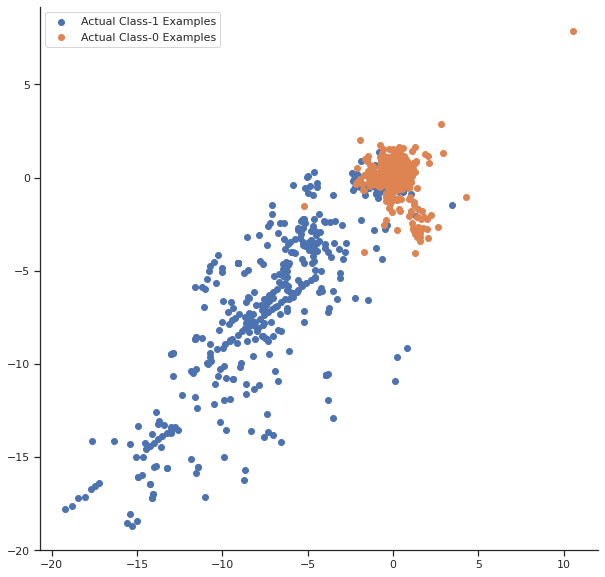

In [140]:
%%time
var_imp = []
for i in tqdm(clf.feature_importances_):
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Print the FPR,TPR & select the best threshold from the roc curve

In [141]:
%%time
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9794748351479944
XGBoost threshold: 0.002351334085687995
CPU times: user 27.9 ms, sys: 1 ms, total: 28.9 ms
Wall time: 27.7 ms


# Model Selection:
Overall conclusion after running models on Oversampled data:
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV

Model Accuracy: 0.9993

XGboost roc_value: 0.9794

XGBoost threshold: 0.002351

